In [ ]:
import numpy as np # lineer cebir
import pandas as pd # data işleme,cv dosyaları i/o

import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input
from keras.models import Model
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers import Conv2D, AveragePooling2D,MaxPool2D,ZeroPadding2D,Input,MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import regularizers
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
((227+2*0-11)/4)+1

#Çkıktı ve girdi arasındaki farkı hesapladığımız bir formülümüz vardı.
#Girdimiz 224'tü.
#Bu formül bir sonraki çıktı katmanımızı hesaplıyor.
#54.25 yani 55 gibi bir değer almış.Slayta göre girdiyi 227 olarak hesaplamış.
#Burada bir çelişki var. Makaleyle slayt arasında bir çelişki var.
#Bunu yanlış hesapladıklarını söylüyorlar çünkü eğer 224 alırsak girdi 54.25
#çıkıyor.224 demek yerine 227 kullandıklarından bahsediyorlar.Buda 55 çıkıyor.



55.0

In [ ]:
#İlk olarak functional apiyle bunu kodlayalım.Functional apiyle kodlamak için
#Alexneti sequentialla deneyelim.

alexNet = Sequential()

#İlk katmanda bir konvolüsyon katmanımız var.Slayta göre ilk katmanda
#96 tane filtre var diyor.Çıktı katmanı 55-55, 11,11'lik stride'ı 4.

#Sequential apide ilk katman olduğu için input shape veriyoruz.
alexNet.add(Conv2D(96,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(227,227,3)))


#İlk konvolüsyon katmanı bitti.
#Sırada Overlapping maxpooling yapacağız. (3,3) stride'ı 2 olacak.
#MaxPool2D dedikten sonra pool size belirliyoruz.3,3'lük filtreler yani ızgaralar
#kullanılmış.
#Normalde stride 3,3 olması gerekiyordu.Ancak burada 2,2.

alexNet.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))


#Hesaplama yaparsak 55'e düştü.Bakalım max pooling'den sonraki çıktımız ne.

#((55+2*0-3)/2)+1 burada çıktı 27'ye düşüyor.Model 27'ye düştü.

#Sonrasında bir konvolüsyon daha geliyor.5,5'lik 256 tane.
#Burada padding yaptım diyor.Padding demek, bunun etrafına 2 çerçeve siyah
#pixel koydum anlamına geliyor.
#Anlamı, burada konvolüsyon işlemi uyguladım ama çıktım ve girdim aynı.
#Çıktı ve girdi aynıysa padding işlemi uygulanmış anlamına geliyor.

#Paddingi 2 farklı yol ile yapabiliriz.
#Konvolüsyon işlemi yapacağız ama boyutumuz,feature mapimiz değişmeyecek.


#Filtre sayısına bakıyorum 256 tane filtre olacakmış.Stride'ının 1 olduğundan
#bahsediyor.
#İnput shape'e gerek yok.
#256 tane filtre varmış.
#Kernel size 5x5.

#Bu haliyle yaparsak konvolüsyon feature map'i küçültür.
#Konvolüsyon işleminde küçülmeyi engellemek için 2 farklı yöntem var.
#Bunlardan ilki, padding dedikten sonra paddinging 2 parametresi var.
#valid; filtreyi uygula ve kaça düşürürse düşürsün önemli değil.
#Ama same dersek, girdiyle çıktı aynı olsun.Yani konvolüsyon işlemine giren
#feature mapin boyutu değişmesin anlamına gelir.

#Ya da paddingi hiç kullanmadan bu konvolüsyon işleminden bir önce ZeroPadding
#denilen bir katman var.Diyoruzki buraya 2,2'lik bir padding ekleyeceğiz.
#Burada hesaplama yapmamız lazım.Girdiyi bileceğiz, girdiye göre aynı sayıyı
#elde etmek için padding değerini bulup ayarlamamız lazım.Burada 2,2
#Hücre sayısı ya da stride farklı olsaydı 3,3 4,4 gibi paddingler ekleyebilirdik.
#Ama padding same dediğimizde sistem otomatik girdiyle çıktıyı ayarlıyor.

#alexNet.add(ZeroPadding2D((2,2)))

alexNet.add(Conv2D(256,kernel_size=(5,5),strides=(1,1),activation='relu',padding='same'))


#Bir overlapping maxpooling daha yapacağız.Stride 2.

alexNet.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))


#27-3 / 2 + 1 = 13x13.Sonrasında bir konvolüsyon daha yapıyor.Padding = 1.
#Same diyemiyoruz.Paddingi eklememiz lazım.Paddingi 1 yaparsak aynı boyutta olmayabilir.
#Burada paddingimizi kullanalım.


#Maxpooling ekledikten sonra zero padding ekleyelim.
#Çünkü bundan sonra padding yapmamızı istiyor. (1,1) olmasını söylüyor.

#x
#alexNet.add(ZeroPadding2D((1,1)))


#3x3'lük 384 tane, stride'ı 1 olan konvolüsyon
alexNet.add(Conv2D(384,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'))


#Aynı katmandan bir tane daha istiyor.
#alexNet.add(ZeroPadding2D((1,1)))
alexNet.add(Conv2D(384,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'))


#256'lık bir tane istiyor.
#alexNet.add(ZeroPadding2D((1,1)))
alexNet.add(Conv2D(256,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'))


#Max pooling yapıyor.Stride'ı 3,3 olan.
alexNet.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))


#Sornasında 5x5 256'ya inmiş.Flatten edip 2 tane tam bağımlı katmanla bağlicak.

alexNet.add(Flatten())

alexNet.add(Dense(4096,activation='relu'))

alexNet.add(Dense(4096,activation='relu'))

alexNet.add(Dense(1000,activation='softmax'))

alexNet.summary()


#Şunu merak edebiliriz.
#256'lık kernel çıktıktan sonra


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 384)       885120    
                                                                 
 conv2d_20 (Conv2D)          (None, 13, 13, 384)      

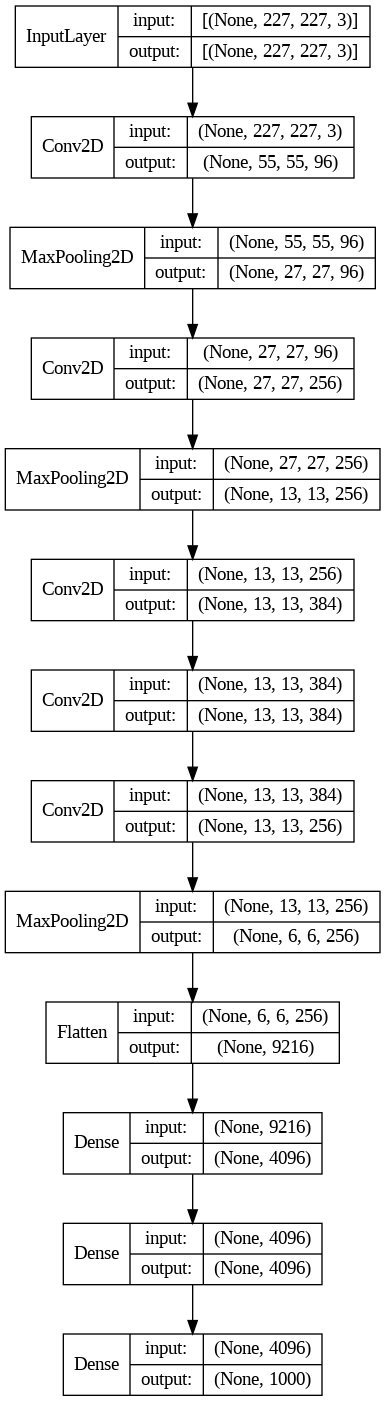

In [ ]:
#Katmanları çizdirelim.Girdi ve çıktıları görelim.
#Zero paddingleri bile katman olarak görüyor.

#İlk konvolüsyonun girdisi 227, çıktısı 55.

#Sonra maxpooling, girdisi 55 çıktısı 27

#Altta konvolüsyon katmanının girdisiyle çıktısının aynı olduğu yer var.
#Burada zero padding katmanı kullanmadığımız için onun ismini vermemiş.
#Orayı same yapmıştık.

#Sonrasında max pooling yapılmış düşürmüş.

#Sonrasında konvolüsyona girmeden önce zero padding yapılmış.
#15'e yükseltilmiş.

#Sonra konvolüsyondan sonra girdiyle çıktının aynı olduğunu görüyoruz.

#Başlangıçta zero padding vermek yerine(x ile gösterdim) yine
#bir önceki katmandaki gibi padding same desek, amaç zaten girdiyle çıktının
#aynı olması ise herhangi bir problem yok.

#Bunu yaptığımızda 1.konvolüsyon işlemi bitti, konvolüsyonda düşürme var.
#2.konvolüsyonda düşme olcak, sonra max poolingde düşme olcak,
#3. konvolüsyonda düşme olmayacak. 13 13 girdi 13 13 çıktı.
#Demekki zero padding demek yerine, konvolüsyondaki katmanlara
#padding same desek aynı işi yapmış oluruz.
#Zero padding yerine konv. katmanlarına same'i ekledik.
#Çıktılarımız birebir aynı oldu.

#Konvolüsyon,max pooling, konvolüsyon, max pooling 3 konv peş peşe, max pooling
#sonrasında böyle devam ediyor.Girdimiz 227 idi.
#3 tane konvolüsyon peş peşe geliyo ve orada değişmiyor.

from keras.utils.vis_utils import plot_model
plot_model(alexNet,to_file='model_plot.png',show_shapes=True,show_layer_names=False)


In [ ]:
 #Bunun functional apisini kodlayacağız.

In [ ]:
#Girdi tanımlayalım.

input = Input(shape=(227,227,3))

x=Conv2D(96,kernel_size=(11,11),strides=(4,4),activation='relu')(input)

x = MaxPooling2D(pool_size=(3,3),strides=(2,2))(x)

x = Conv2D(256,kernel_size=(5,5),strides=(1,1),activation='relu',padding='same')(x)


x = MaxPool2D(pool_size=(3,3),strides=(2,2))(x)

x = Conv2D(384,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same') (x)

x = Conv2D(384,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same') (x)

x= Conv2D(256,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same') (x)

x = MaxPool2D(pool_size=(3,3),strides=(2,2)) (x)

x = Flatten()(x)

x= Dense(4096,activation='relu') (x)

x = Dense(4096,activation='relu') (x)

#Modelimizin çıktısına göre parametreleri değiştirmemiz gerekiyor.Bizim 2 sınıfımız var ama modelin orjinalinde 1000 sınıf var.
#O yüzden outputta çıktı katmanımızı 1 yapıyoruz.
#İkili sınıflandırma yaptığımız içinde sigmoid yapıyoruz
output = Dense(1,activation='sigmoid') (x)

#AlexNet'in functional api ile yapılışı olduğundan F ekledik.
#Birden fazla input verebiliriz listeler halinde.
alexNetF = Model(inputs=input,outputs = output)

alexNetF.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120

In [ ]:
#Veriyi eğitelim.09.05'teki kodu alalım.
#Girdi boyutumuz 227,227,3

train_path = './drive/MyDrive/Deep Learning/chest_xray/train'
test_path = './drive/MyDrive/Deep Learning/chest_xray/test'

trainGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    vertical_flip=True,
    horizontal_flip=True,
    zoom_range=0.5,
    validation_split = 0.1
)

trainData=trainGen.flow_from_directory(
    train_path,
    target_size=(227,227),
    class_mode='binary',
    batch_size=8,
    #Görüntümüz gri değilde rgb yani 3 kanallı görüntüler olsun.Çünkü modelimiz 3 kanallı
    #görüntüler istiyor.
    color_mode='rgb',
    subset='training'
)

valData=trainGen.flow_from_directory(
    train_path,
    target_size=(227,227),
    class_mode='binary',
    batch_size=8,
    color_mode='rgb',
    subset='validation'
)

testData=testGen.flow_from_directory(
    test_path,
    #test datayı 28 28 yapmıştık çok bozuk geldi görüntü.
    target_size=(227,227),
    class_mode='binary',
    color_mode='rgb',
    batch_size=1
)

#Binary crossentropy olacak.Şuna dikkat etmeliyiz.Modelimizin çıktısına göre parametreleri
#değiştirmemiz gerekiyor.Bizim 2 sınıfımız var ama modelin orjinalinde 1000 sınıf var.
#O yüzden outputta çıktı katmanımızı 1 yapıyoruz.
alexNetF.compile(loss="binary_crossentropy",optimizer="sgd",metrics=['accuracy'])

history = alexNetF.fit(X_train,y_train,batch_size=128,epochs=15,validation_split=0.1,validation_batch_size=128)
